# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from scipy.stats import linregress

file_path = "/Users/zay/Desktop/Boot Camp/Module 6/python-api-challenge/"
# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [749]:
### Generate the Cities List by Using the `citipy` Library

In [751]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [755]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [757]:
# Loop through all the cities in our list to fetch weather data

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

         #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

        

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

#sets the datetime of when the database was created to present in later visualizations
date = datetime.datetime.now()
date = date.strftime("%m-%d-%Y")

Processing Record 1 of Set 1 | porto franco
http://api.openweathermap.org/data/2.5/weather?appid=eb9e9b32c4ebf559b7f9c46b08bf5829&units=metric&q=porto franco
Processing Record 2 of Set 1 | port-aux-francais
http://api.openweathermap.org/data/2.5/weather?appid=eb9e9b32c4ebf559b7f9c46b08bf5829&units=metric&q=port-aux-francais
Processing Record 3 of Set 1 | nanao
http://api.openweathermap.org/data/2.5/weather?appid=eb9e9b32c4ebf559b7f9c46b08bf5829&units=metric&q=nanao
Processing Record 4 of Set 1 | saldanha
http://api.openweathermap.org/data/2.5/weather?appid=eb9e9b32c4ebf559b7f9c46b08bf5829&units=metric&q=saldanha
Processing Record 5 of Set 1 | onoda
http://api.openweathermap.org/data/2.5/weather?appid=eb9e9b32c4ebf559b7f9c46b08bf5829&units=metric&q=onoda
Processing Record 6 of Set 1 | baukau
http://api.openweathermap.org/data/2.5/weather?appid=eb9e9b32c4ebf559b7f9c46b08bf5829&units=metric&q=baukau
Processing Record 7 of Set 1 | kachkanar
http://api.openweathermap.org/data/2.5/weather?ap

In [765]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [767]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,porto franco,-6.3383,-47.3992,24.94,90,100,0.68,BR,1731621160
1,port-aux-francais,-49.3500,70.2167,2.95,74,81,10.58,TF,1731621161
2,nanao,37.0500,136.9667,14.10,89,100,1.21,JP,1731621162
3,saldanha,-33.0117,17.9442,17.03,88,90,6.64,ZA,1731621163
4,onoda,34.0014,131.1836,18.01,88,100,3.09,JP,1731621164


In [769]:
# Export the City_Data into a csv
city_data_df.to_csv(f"{file_path}cities.csv", index_label="City_ID")


In [7]:
# Read saved data
city_data_df = pd.read_csv(f"{file_path}cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,porto franco,-6.3383,-47.3992,24.94,90,100,0.68,BR,1731621160
1,port-aux-francais,-49.3500,70.2167,2.95,74,81,10.58,TF,1731621161
2,nanao,37.0500,136.9667,14.10,89,100,1.21,JP,1731621162
3,saldanha,-33.0117,17.9442,17.03,88,90,6.64,ZA,1731621163
4,onoda,34.0014,131.1836,18.01,88,100,3.09,JP,1731621164


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

NameError: name 'date' is not defined

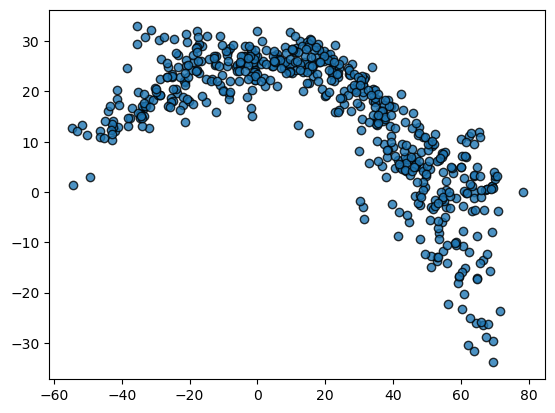

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs Temperature ({date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig(f"{file_path}output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

NameError: name 'date' is not defined

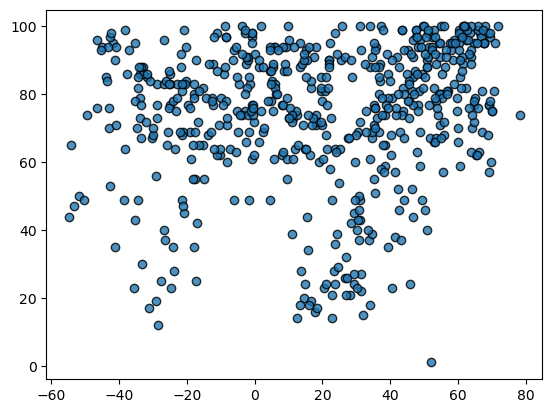

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.title(f'City Latitude vs Humidity (%) ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig(f"{file_path}output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

NameError: name 'date' is not defined

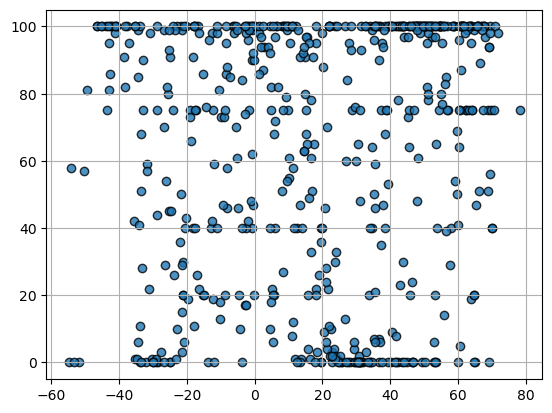

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.grid(True) 
plt.title(f'City Latitude vs Cloudiness (%) ({date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()

# Save the figure
plt.savefig(f"{file_path}output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

NameError: name 'date' is not defined

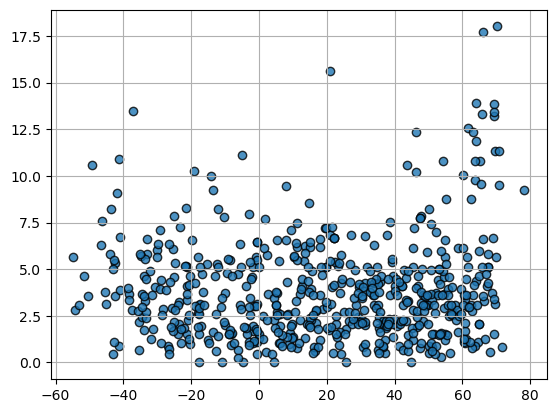

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.grid(True) 
plt.title(f'City Latitude vs Wind Speed ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.tight_layout()

# Save the figure
plt.savefig(f"{file_path}output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [70]:
# Define a function to create Linear Regression plots
def linearRegressionplots(x_values, y_values, x_label="X-axis", y_label="Y-axis", title="Scatter Plot"):

    slope = linregress(x_values, y_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    
    print(f'The r-value is {rvalue}')
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "-r")
    plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    return plt

In [72]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,nanao,37.0500,136.9667,14.10,89,100,1.21,JP,1731621162
4,onoda,34.0014,131.1836,18.01,88,100,3.09,JP,1731621164
5,baukau,51.5526,7.2042,9.16,94,100,1.54,DE,1731621165
6,kachkanar,58.7000,59.4948,-1.16,83,100,6.16,RU,1731621166
7,kodiak,57.7900,-152.4072,3.73,93,40,3.09,US,1731621167


In [74]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,porto franco,-6.3383,-47.3992,24.94,90,100,0.68,BR,1731621160
1,port-aux-francais,-49.3500,70.2167,2.95,74,81,10.58,TF,1731621161
3,saldanha,-33.0117,17.9442,17.03,88,90,6.64,ZA,1731621163
8,lebu,-37.6167,-73.6500,14.67,86,100,2.82,CL,1731621169
13,alofi,-19.0595,-169.9187,25.94,69,75,10.29,NU,1731621174


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8412137890591619


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

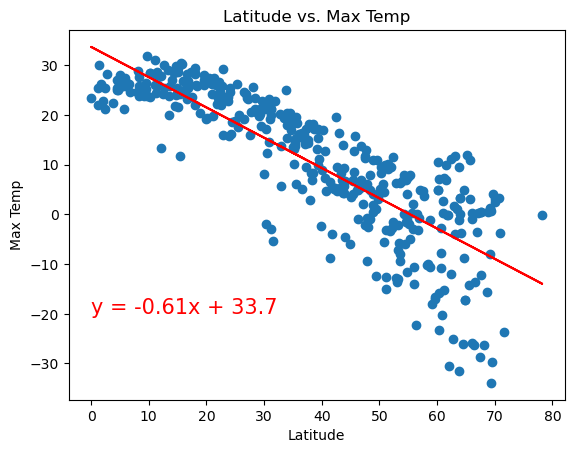

In [77]:
# Linear regression on Northern Hemisphere
linearRegressionplots(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Latitude vs. Max Temp")

The r-value is 0.6384763144789513


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

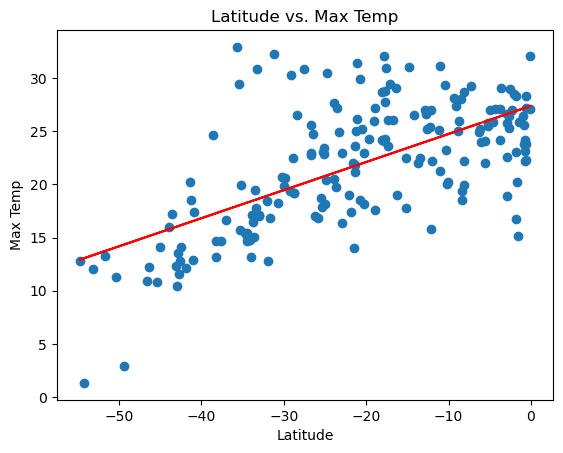

In [79]:
# Linear regression on Southern Hemisphere
linearRegressionplots(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Latitude vs. Max Temp")

**Discussion about the linear relationship:** 
- Both the Southern and Nothern hemispheres trend towards having higher maximum temperatures as the Latitude goes near the Equator

- 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.25576394271482833


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

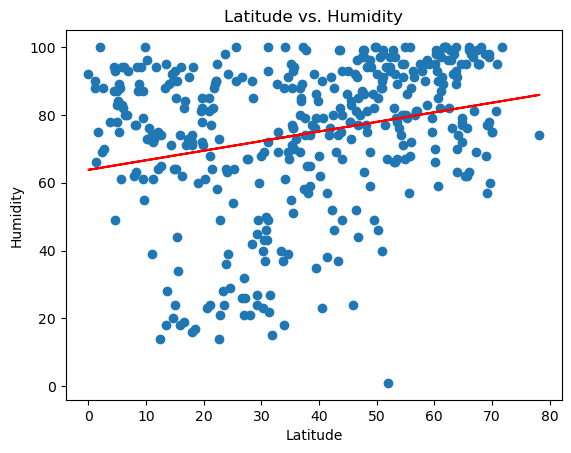

In [36]:
# Northern Hemisphere
linearRegressionplots(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Latitude vs. Humidity")

The r-value is 0.1688096402851491


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

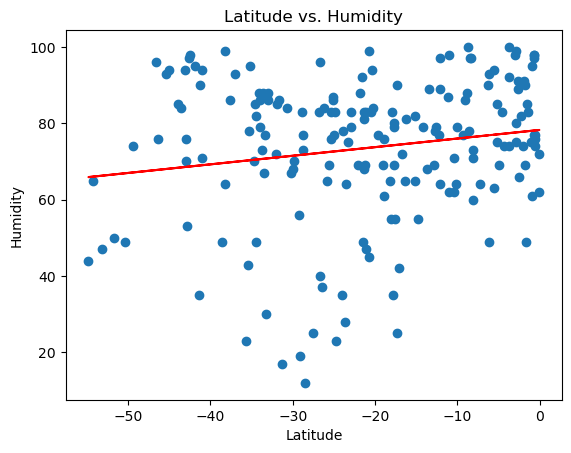

In [38]:
# Southern Hemisphere
linearRegressionplots(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Latitude vs. Humidity")

In [40]:
print(f"South {len(southern_hemi_df)}")
print(f"North {len(northern_hemi_df)}")


South 186
North 401


**Discussion about the linear relationship:** Humiditity seems to be generally the same. Because the northen hemisphere has more cities the regression line is sligthy exagerated when compared to the southern hemishphere. This point should be taken into consideration for all other linear relationship discussions

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.206182834910676


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

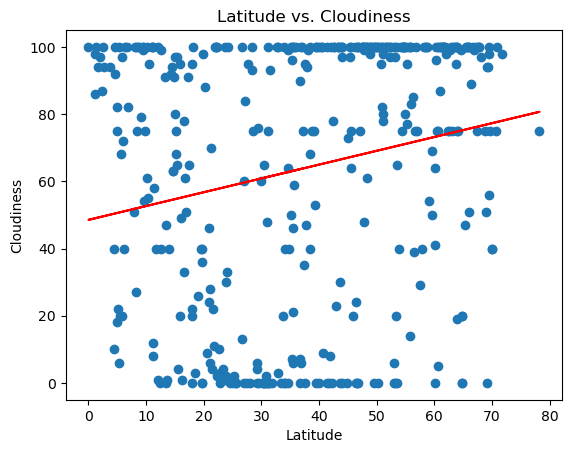

In [44]:
# Northern Hemisphere
linearRegressionplots(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Latitude vs. Cloudiness")

The r-value is 0.05075548960261058


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

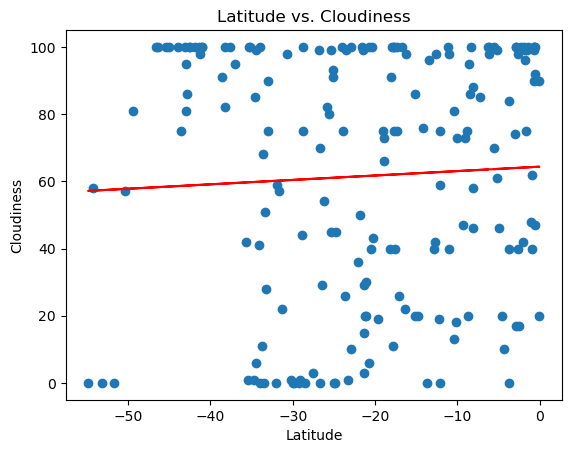

In [46]:
# Southern Hemisphere
linearRegressionplots(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Latitude vs. Cloudiness")

**Discussion about the linear relationship:** The more north the more clouds in both hemispheres especailly in the northern hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.22025621938959075


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

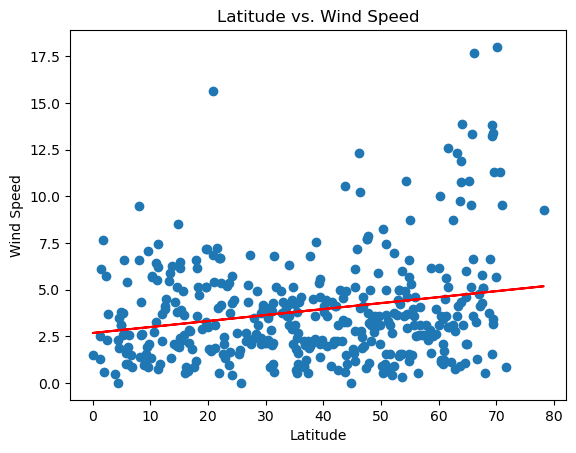

In [50]:
# Northern Hemisphere
linearRegressionplots(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Latitude vs. Wind Speed")

The r-value is -0.20427417201458115


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

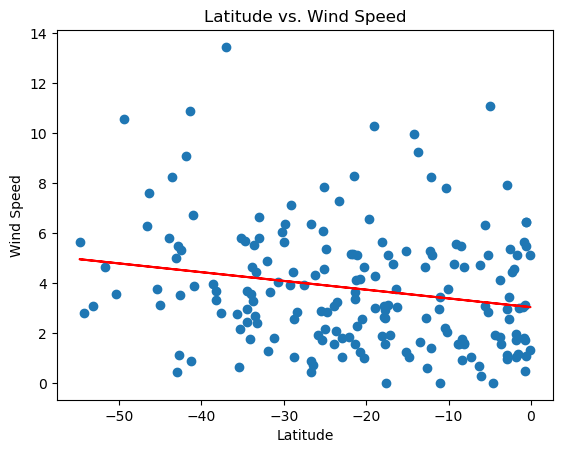

In [51]:
# Southern Hemisphere
linearRegressionplots(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Latitude vs. Wind Speed")

**Discussion about the linear relationship:** As the distance towards the equator decreases the Wind speed decreases. The data shows the as the cities go towards either pole, the wind speed trends upwards